# Description of the Loan Prediction Problem

Problem:-

Dream Housing Finance company handles various forms of home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).
       

# Load pre-requisite Libaries


In [31]:
import pandas as pd
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt 

Import the files to be used in the classification problem

In [2]:
# Importing files
train = pd.read_csv('train_data_set.csv')
test = pd.read_csv('test_data_set.csv')

# Understand the data

In [3]:
train.shape

(614, 13)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Types

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Number of each type of column
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

## Explore and Clean the Data

Transform the Dependents column, it is a factor class.  See below

In [7]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

 Handling Missing Values

Check How many Null Values in each columns

In [9]:
#train.isnull().sum()
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(train)


Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [10]:
missing_values_table(test)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,29,7.9
Self_Employed,23,6.3
Gender,11,3.0
Dependents,10,2.7
Loan_Amount_Term,6,1.6
LoanAmount,5,1.4


In [11]:
train['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
columns_df = ['Gender','Married','Dependents','Self_Employed','Credit_History']
columns_df[2]

'Dependents'

Impute missing values using a naive approach. We shall use mode for the categorical variables. It is important to note that the percentage of missing values are mostly less than 5 percent and therefore can not cause much harm to our model. However variable `credit history` has 8 percent which is a bit alarming. However, for now we shall impute by the mode for simplicity.

In [13]:
# Train Categorical Variables Missisng values
columns_df = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for i in range(len(columns_df)):
    train[columns_df[i]].fillna(train[columns_df[i]].mode()[0], inplace=True)
    test[columns_df[i]].fillna(test[columns_df[i]].mode()[0], inplace=True)



In [14]:
columns_df = ['Loan_Amount_Term','LoanAmount']
for i in range(len(columns_df)):
    train[columns_df[i]].fillna(train[columns_df[i]].median(), inplace=True)
    test[columns_df[i]].fillna(test[columns_df[i]].median(), inplace=True)

test Check if any Null Values Exits 


In [15]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:
missing_values_table(test)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
# Outlier treatment 
train['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])

In [18]:
# Separting the Variable into Independent and Dependent 
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values


# Check if Dataset is Unbalanced

In [19]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

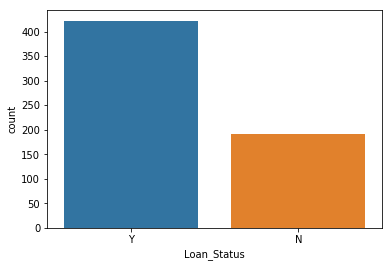

In [20]:
ax = sns.countplot(x="Loan_Status", data=train)

In [21]:
val = train['Loan_Status'].value_counts()
print ("The propotion of Y and N is",(val[0]/(train.shape[0])*100),(val[1]/(train.shape[0])*100))

The propotion of Y and N is 68.72964169381108 31.27035830618892


# Preposessing of the varibales

Create dummy variables from the  Categorical variables so that they can be used in prediction

In [22]:
 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()

lit = [0,1,3,4,-1]
for i in range(len(lit)):
    X[:,lit[i]] = labelencoder_X.fit_transform(X[:,lit[i]])

# Dummy Varaibles
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Modelling and prediction

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Splitting the dataset into the Training set and Test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 129)

In [25]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression Model

In [26]:
# Fitting Logistic Regression to our training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8005068027210885

# Gaussian Naive Bayes model 

In [27]:
# Fitting Decision Tree Classification to the Training set
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7862993197278911

# KNN Model

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7780493197278912

# Decision Tree

In [29]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.686515306122449

# SVM

In [30]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8004659863945578